In [47]:
import numpy as np

In [48]:
import pandas as pd

In [49]:
import matplotlib.pyplot as mt

In [50]:
dataset = pd.read_csv("train (1).csv")

In [51]:
numeric_data = dataset.select_dtypes(include=['number'])
print(numeric_data)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


In [52]:
correlations = numeric_data.corr()['Survived'].sort_values(ascending=False)

print(correlations)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


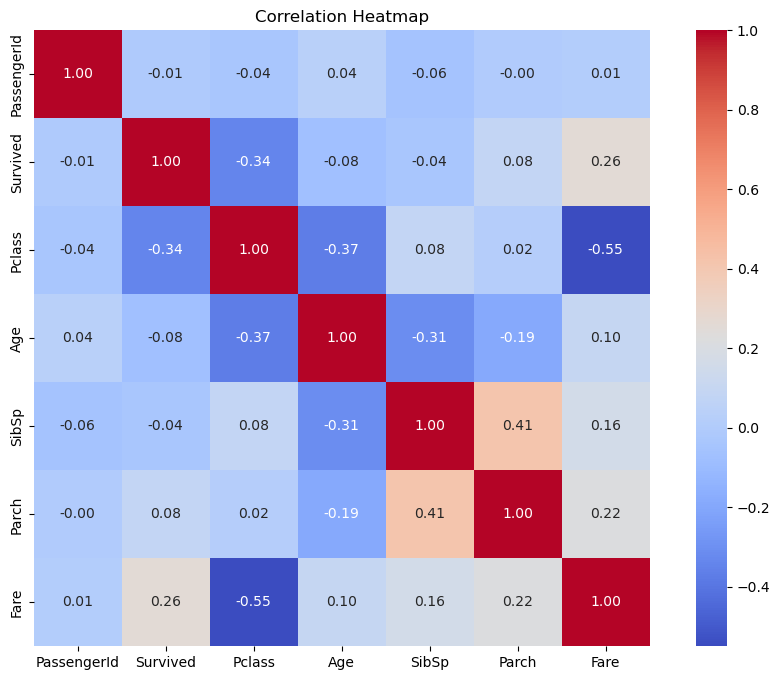

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap( numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [54]:
X = dataset.iloc[:,2:].values
y = dataset.iloc[:,1].values

In [55]:
print(X)

[[3 'Braund, Mr. Owen Harris' 'male' ... 7.25 nan 'S']
 [1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' ...
  71.2833 'C85' 'C']
 [3 'Heikkinen, Miss. Laina' 'female' ... 7.925 nan 'S']
 ...
 [3 'Johnston, Miss. Catherine Helen "Carrie"' 'female' ... 23.45 nan 'S']
 [1 'Behr, Mr. Karl Howell' 'male' ... 30.0 'C148' 'C']
 [3 'Dooley, Mr. Patrick' 'male' ... 7.75 nan 'Q']]


In [56]:
 X = np.delete(X, 1, axis=1)


In [57]:
 X = np.delete(X, 5, axis=1)


In [58]:
print(X)

[[3 'male' 22.0 ... 7.25 nan 'S']
 [1 'female' 38.0 ... 71.2833 'C85' 'C']
 [3 'female' 26.0 ... 7.925 nan 'S']
 ...
 [3 'female' nan ... 23.45 nan 'S']
 [1 'male' 26.0 ... 30.0 'C148' 'C']
 [3 'male' 32.0 ... 7.75 nan 'Q']]


In [59]:
 X = np.delete(X, 6, axis=1)

In [60]:
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [61]:
from sklearn.impute import SimpleImputer 
ageImputer = SimpleImputer(missing_values = np.nan , strategy = "mean")
X[:,2:3] = ageImputer.fit_transform(X[:,2:3])  

In [62]:
print(X[: ,:  ])

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' 29.69911764705882 ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [63]:
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming X["Embarked"] is a Pandas Series
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent' ) 

# Reshape the column into 2D array and fit_transform
X[:,6:] = imputer.fit_transform(X[:,6:]) 


In [64]:
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' 29.69911764705882 ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

In [66]:
print(X)

[[3 1 22.0 ... 0 7.25 'S']
 [1 0 38.0 ... 0 71.2833 'C']
 [3 0 26.0 ... 0 7.925 'S']
 ...
 [3 0 29.69911764705882 ... 2 23.45 'S']
 [1 1 26.0 ... 0 30.0 'C']
 [3 1 32.0 ... 0 7.75 'Q']]


In [67]:
print(type(X)) 

<class 'numpy.ndarray'>


In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',  OneHotEncoder(sparse_output = False), [6])], remainder='passthrough') 

In [69]:
X = ct.fit_transform(X)

In [70]:
print(X)

[[0.0 0.0 1.0 ... 1 0 7.25]
 [1.0 0.0 0.0 ... 1 0 71.2833]
 [0.0 0.0 1.0 ... 0 0 7.925]
 ...
 [0.0 0.0 1.0 ... 1 2 23.45]
 [1.0 0.0 0.0 ... 0 0 30.0]
 [0.0 1.0 0.0 ... 0 0 7.75]]


In [71]:
print(type(X))

<class 'numpy.ndarray'>


In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) 

In [73]:
print(X)

[[-0.48204268 -0.30756234  0.61583843 ...  0.43279337 -0.47367361
  -0.50244517]
 [ 2.0745051  -0.30756234 -1.62380254 ...  0.43279337 -0.47367361
   0.78684529]
 [-0.48204268 -0.30756234  0.61583843 ... -0.4745452  -0.47367361
  -0.48885426]
 ...
 [-0.48204268 -0.30756234  0.61583843 ...  0.43279337  2.00893337
  -0.17626324]
 [ 2.0745051  -0.30756234 -1.62380254 ... -0.4745452  -0.47367361
  -0.04438104]
 [-0.48204268  3.25137334 -1.62380254 ... -0.4745452  -0.47367361
  -0.49237783]]


In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y) 

LogisticRegression(random_state=0)

In [75]:
datasetTest = pd.read_csv("test.csv")

In [76]:
Xtest = datasetTest[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values 

KeyError: "None of [Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')] are in the [columns]"

In [ ]:
print(Xtest)

In [ ]:
Xtest[:,2:3] = ageImputer.transform(Xtest[:,2:3]) 

In [ ]:
print(Xtest[0]) 

In [ ]:
print(Xtest)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Xtest[:,1] = le.fit_transform(Xtest[:,1])

In [ ]:
print(Xtest)

In [ ]:
print(Xtest[152])

In [ ]:
Xtest[:,6:] = imputer.transform(Xtest[:,6:]) 


In [ ]:
fareImputer = SimpleImputer(missing_values = np.nan , strategy = "mean")
Xtest[:,5:6] = fareImputer.fit_transform(Xtest[:,5:6])  

In [ ]:
print(Xtest[152]) 

In [ ]:
Xtest = ct.transform(Xtest) 

In [ ]:
print(Xtest)

In [ ]:
Xtest = sc.transform(Xtest)

In [ ]:
nan_indices = np.argwhere(np.isnan(Xtest))
print(nan_indices)

In [ ]:
print(Xtest[152])

In [ ]:
y_pred = classifier.predict(Xtest)

In [ ]:
print(y_pred)

In [ ]:
final = pd.DataFrame()
final['PassengerId'] = datasetTest['PassengerId']
final['Survived'] = y_pred
final.to_csv('output.csv', index=False)